<a href="https://colab.research.google.com/github/vommilahari28/Ecommerce-Website/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

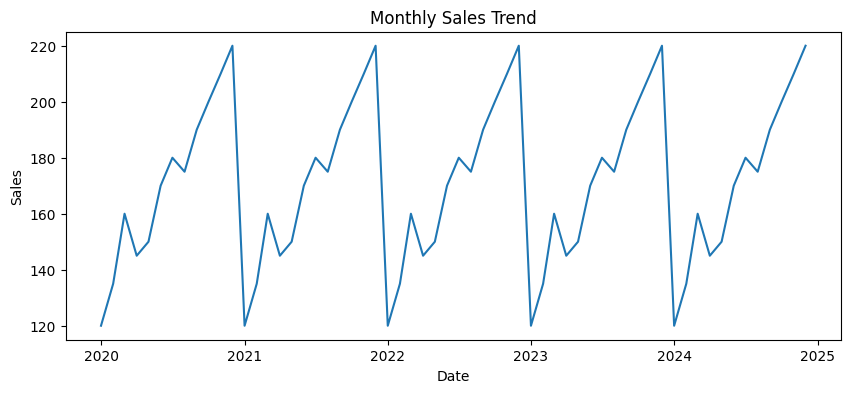

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 343.017
Date:                            Wed, 10 Dec 2025   AIC                           -676.035
Time:                                    15:18:37   BIC                           -668.258
Sample:                                01-01-2020   HQIC                          -673.350
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       6.237e-06   8.93e-24   6.99e+17      0.000    6.24e-06    6.24e-06
ma.L1      -1.066e-09   8.97e-24  -

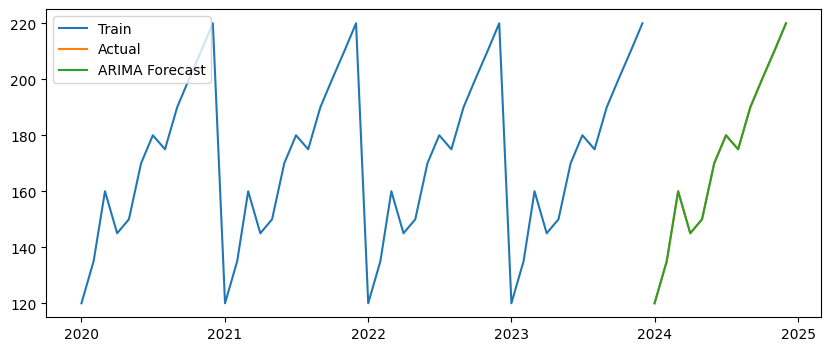

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


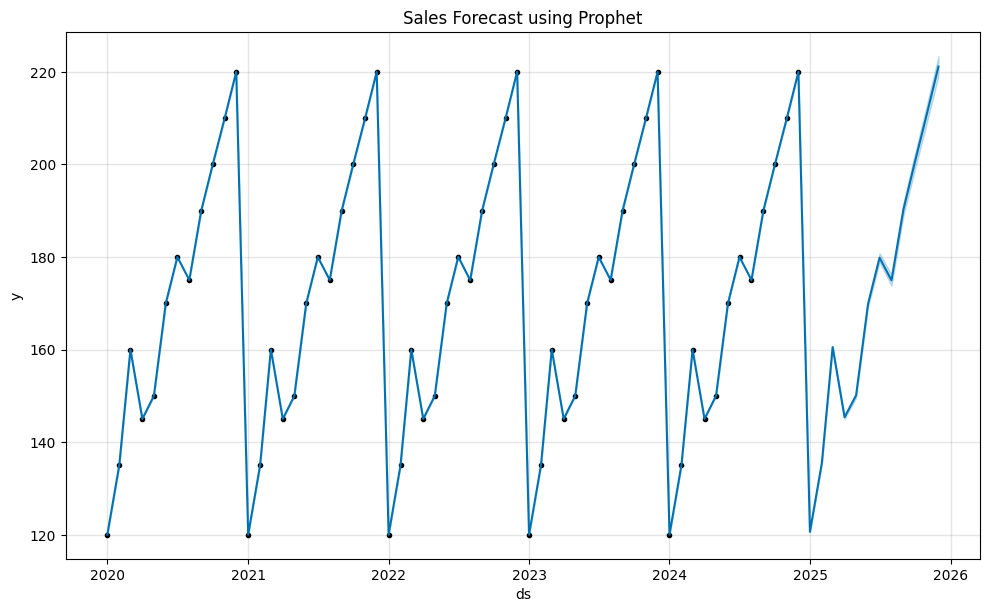

,ds,yhat,yhat_lower,yhat_upper
60,2024-12-31,120.613926,120.579984,120.641945
61,2025-01-31,135.495023,135.377025,135.596288
62,2025-02-28,160.521513,160.283141,160.734086
63,2025-03-31,145.358097,144.959889,145.708831
64,2025-04-30,150.099688,149.530231,150.643258
65,2025-05-31,169.841452,169.066348,170.604019
66,2025-06-30,179.829286,178.855344,180.818873
67,2025-07-31,174.952327,173.745596,176.210157
68,2025-08-31,190.238470,188.858948,191.776705
69,2025-09-30,200.577742,198.904099,202.350525


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
df = pd.read_csv("/content/sales.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df.head()
plt.figure(figsize=(10,4))
plt.plot(df['sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
df.isna().sum()
train = df.iloc[:-12]
test = df.iloc[-12:]
model = SARIMAX(train['sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()
print(result.summary())
pred = result.predict(start=test.index[0], end=test.index[-1])
mae = mean_absolute_error(test['sales'], pred)
rmse = np.sqrt(mean_squared_error(test['sales'], pred))

print("ARIMA MAE:", mae)
print("ARIMA RMSE:", rmse)
plt.figure(figsize=(10,4))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Actual')
plt.plot(pred, label='ARIMA Forecast')
plt.legend()
plt.show()
prophet_df = df.reset_index()
prophet_df.columns = ['ds', 'y']
m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq="M")
forecast = m.predict(future)
m.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
